# 1. Import Packages & Read data

In [138]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

closed_deal_df = pd.read_csv('closed_deals.csv')
customer_df = pd.read_csv("customers.csv")
geolocation_df = pd.read_csv("geolocation.csv")
marketing_qualified_leads_df = pd.read_csv("marketing_qualified_leads.csv")
order_items_df = pd.read_csv("order_items.csv")
order_payments_df = pd.read_csv("order_payments.csv")
order_reviews_df = pd.read_csv("order_reviews.csv")
orders_df = pd.read_csv("orders.csv")
product_category_name_translation_df = pd.read_csv("product_category_name_translation.csv")
products_df = pd.read_csv("products.csv")
sellers = pd.read_csv("sellers.csv")

# 2. Data Cleaning

In [147]:
#Remove data after July 2018 and before Jan 2017
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df = orders_df[(orders_df['order_purchase_timestamp'] < "2018-08-01") & (orders_df['order_purchase_timestamp'] >= "2017-01-01")]

# 3. Data Exploration

### Data Preparation

In [174]:
orders_df['order_purchase_month'] = pd.DatetimeIndex(orders_df['order_purchase_timestamp']).month
orders_df['order_purchase_quarter'] = pd.DatetimeIndex(orders_df['order_purchase_timestamp']).quarter
orders_df['order_purchase_year'] = pd.DatetimeIndex(orders_df['order_purchase_timestamp']).year
orders_df['order_purchase_day'] = orders_df['order_purchase_timestamp'].dt.date



order_merged_df = orders_df.merge(customer_df, how = 'left', on = 'customer_id')
order_merged_df = order_merged_df.merge(order_reviews_df, how = 'left', on = 'order_id')
order_merged_df = order_merged_df.merge(order_payments_df, how = 'left', on = 'order_id')


product_merged_df = products_df.merge(product_category_name_translation_df, how='left', on="product_category_name")
order_items_merged_df = order_items_df.merge(product_merged_df,how='left', on="product_id")

order_with_product_merged_df = order_merged_df.merge(order_items_merged_df, how = 'left', on = 'order_id')
                                         

### 3.1 Total Number of Unique Customer

In [175]:
unique_customer = order_merged_df['customer_unique_id'].nunique()
f'Total Number of unique customer: {unique_customer}'

'Total Number of unique customer: 89503'

### 3.2 Total Revenue

Text(0.5, 1.0, 'Revenue by Day')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Revenue')

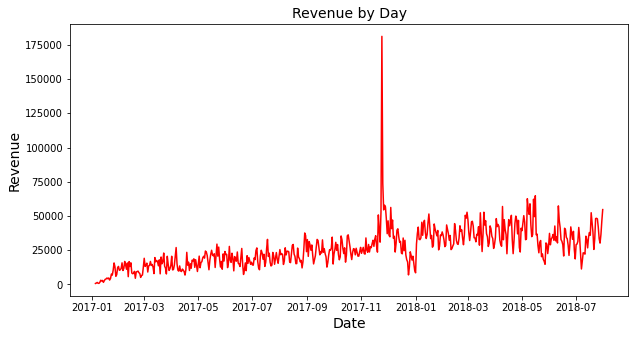

In [213]:
#Revenue by day
daily_revenue = order_merged_df.groupby(['order_purchase_day']).sum()[['payment_value']]

plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(daily_revenue, color='red')
plt.title('Revenue by Day', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.show()



Text(0, 0.5, 'Revenue')

Text(0.5, 0, 'Month Number')

Text(0.5, 1.0, 'Revenue by Month')

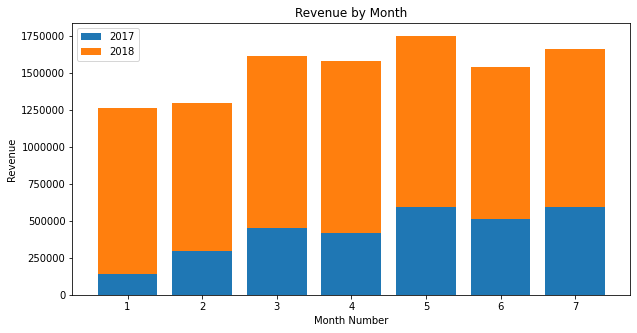

In [277]:
#Revenue by Month (2017 vs 2018)
monthly_revenue = order_merged_df.groupby(['order_purchase_year','order_purchase_month']).sum()[['payment_value']]
monthly_revenue.reset_index(inplace = True)
monthly_revenue_2017 = monthly_revenue[ (monthly_revenue['order_purchase_year'] == 2017) &
                       (monthly_revenue['order_purchase_month'] <= 7) ]                                    
monthly_revenue_2018 = monthly_revenue[ monthly_revenue['order_purchase_year'] == 2018 ]


fig, ax = plt.subplots()
ax1 = ax.bar(monthly_revenue_2017.order_purchase_month, monthly_revenue_2017.payment_value,  label='2017')
ax2 = ax.bar(monthly_revenue_2018.order_purchase_month, monthly_revenue_2018.payment_value, 
       bottom=monthly_revenue_2017.payment_value, label='2018')
ax.ticklabel_format(style='plain')
ax.set_ylabel('Revenue')
ax.set_xlabel('Month Number')
ax.set_title('Revenue by Month')
ax.legend()
plt.show()

<AxesSubplot:xlabel='order_purchase_year'>

Text(0, 0.5, 'Revenue')

Text(0.5, 1.0, '2017 (Jan - Dec) Revenue vs 2018 Revenue (Jan - July)')

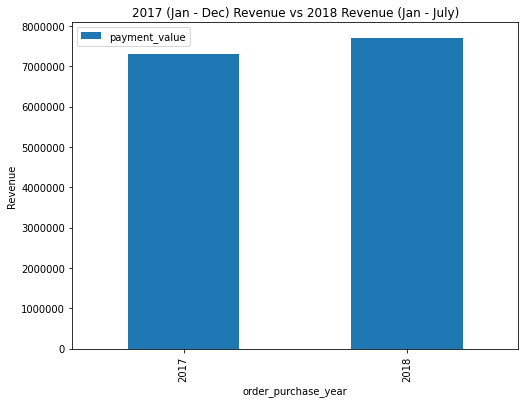

In [271]:
#Revenue by Year
revenue_year = order_merged_df.groupby(['order_purchase_year']).sum()[['payment_value']]

plt.rcParams['figure.figsize'] = [8, 6]
revenue_year.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Revenue')
plt.title('2017 (Jan - Dec) Revenue vs 2018 Revenue (Jan - July)')

### 3.3 Total Order Volume

Text(0.5, 1.0, 'Volume by Day')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Volume')

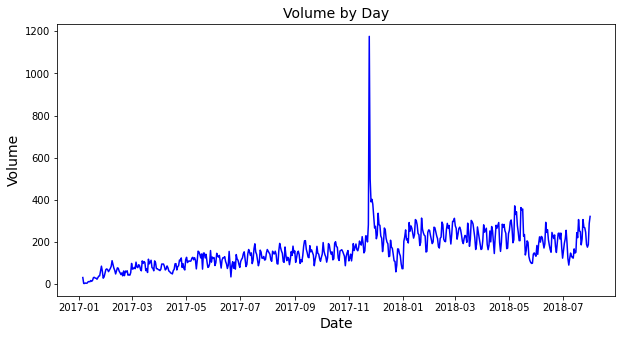

In [286]:
#Revenue by day
daily_volume = orders_df.groupby(['order_purchase_day']).count()[['order_id']]

plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(daily_volume, color='blue')
plt.title('Volume by Day', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.show()

Text(0, 0.5, 'Volume')

Text(0.5, 0, 'Month Number')

Text(0.5, 1.0, 'Volume by Month')

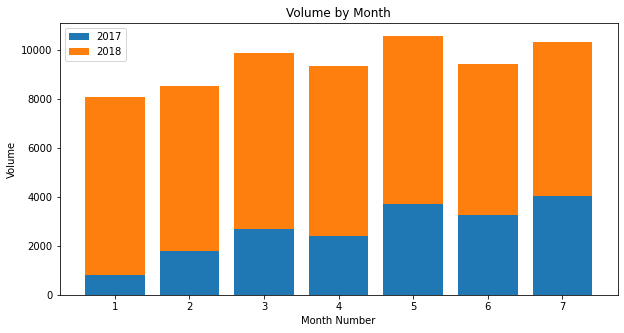

In [283]:
#Volume by Month (2017 vs 2018)
monthly_volume = orders_df.groupby(['order_purchase_year','order_purchase_month']).count()[['order_id']]
monthly_volume.reset_index(inplace = True)
monthly_volume_2017 = monthly_volume[ (monthly_volume['order_purchase_year'] == 2017) &
                       (monthly_volume['order_purchase_month'] <= 7) ]                                    
monthly_volume_2018 = monthly_volume[ monthly_volume['order_purchase_year'] == 2018 ]


fig, ax = plt.subplots()
ax1 = ax.bar(monthly_volume_2017.order_purchase_month, monthly_volume_2017.order_id,  label='2017')
ax2 = ax.bar(monthly_volume_2018.order_purchase_month, monthly_volume_2018.order_id, 
       bottom=monthly_volume_2017.order_id, label='2018')
ax.ticklabel_format(style='plain')
ax.set_ylabel('Volume')
ax.set_xlabel('Month Number')
ax.set_title('Volume by Month')
ax.legend()
plt.show()

<AxesSubplot:xlabel='order_purchase_year'>

Text(0, 0.5, 'Revenue')

Text(0.5, 1.0, '2017 (Jan - Dec) Volume vs 2018 Volume (Jan - July)')

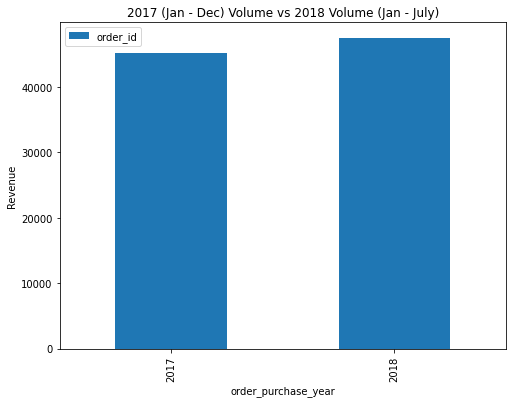

In [285]:
volume_year = orders_df.groupby(['order_purchase_year']).count()[['order_id']]

plt.rcParams['figure.figsize'] = [8, 6]
volume_year.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Revenue')
plt.title('2017 (Jan - Dec) Volume vs 2018 Volume (Jan - July)')

### 3.4 Customer Satisfaction

In [90]:
customer_satisfaction_df = order_merged_df.drop_duplicates(subset='order_id', keep="first")
#Review by Month
customer_satisfaction_df.groupby(['order_purchase_year','order_purchase_month']).agg(
                                                                    Mean=('review_score', np.mean), 
                                                                    Median=('review_score', np.median),
                                                                    Count=('review_score', 'count'),
                                                                    Standard_Deviation=('review_score', np.std))

#Review by Quarter
customer_satisfaction_df.groupby(['order_purchase_year','order_purchase_quarter']).agg(
                                                                    Mean=('review_score', np.mean), 
                                                                    Median=('review_score', np.median),
                                                                    Count=('review_score', 'count'),
                                                                    Standard_Deviation=('review_score', np.std))

#Review by Year
customer_satisfaction_df.groupby(['order_purchase_year']).agg(
                                            Mean=('review_score', np.mean), 
                                            Median=('review_score', np.median),
                                            Count=('review_score', 'count'),
                                            Standard_Deviation=('review_score', np.std))


Mean  Median  Count  Standard_Deviation
order_purchase_year order_purchase_month                                             
2017                1                     4.063291     5.0    790            1.376443
                    2                     4.016403     5.0   1768            1.389288
                    3                     4.075911     5.0   2661            1.339491
                    4                     4.046921     5.0   2387            1.345064
                    5                     4.143753     5.0   3666            1.285796
                    6                     4.146053     5.0   3218            1.288788
                    7                     4.176441     5.0   3990            1.258293
                    8                     4.238250     5.0   4298            1.229915
                    9                     4.187250     5.0   4251            1.266301
                    10                    4.124973     5.0   4593            1.306499
                    11                    3.910027     5.0   7480            1.456525
                    12                    4.019066     5.0   5612            1.386530
2018                1                     4.041105     5.0   7201            1.372843
                    2                     3.827188     5.0   6672            1.502795
                    3                     3.753078     4.0   7148            1.543873
                    4                     4.163591     5.0   6883            1.283646
                    5                     4.193888     5.0   6839            1.262950
                    6                     4.277479     5.0   6141            1.205928
                    7                     4.263166     5.0   6247            1.231807

Mean  Median  Count  Standard_Deviation
order_purchase_year order_purchase_quarter                                             
2017                1                       4.053842     5.0   5219            1.362158
                    2                       4.119620     5.0   9271            1.302903
                    3                       4.201292     5.0  12539            1.251572
                    4                       4.000452     5.0  17685            1.399300
2018                1                       3.875268     5.0  21021            1.479176
                    2                       4.209233     5.0  19863            1.253741
                    3                       4.263166     5.0   6247            1.231807

,Mean,Median,Count,Standard_Deviation
order_purchase_year,,,,
2017,4.087713,5.0,44714,1.337572
2018,4.067429,5.0,47131,1.367251


### 3.5 Customer Segmentation

In [299]:
#By Amount Spent
customer_total_spend = order_merged_df.groupby(['customer_unique_id']).agg(
                                                  Total_Amount_Spend=('payment_value', 'sum'), 
                                                  Order_Volume=('payment_value', 'count')).sort_values(by = 'Total_Amount_Spend', ascending = False)

percentile = customer_total_spend[['Total_Amount_Spend']].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9, .99, 1])
percentile.index.name = 'Percentile'
percentile

,Total_Amount_Spend
Percentile,
0.10,40.1700
0.20,55.5040
0.30,70.2500
0.40,87.6700
0.50,108.3000
0.60,133.6120
0.70,163.9200
0.80,211.1160
0.90,321.8200


In [303]:
#By Top Product Category
customer_category_df = order_with_product_merged_df[['order_id','customer_id','customer_unique_id','price', 'product_category_name_english']].drop_duplicates()

customer_category_df = customer_category_df.groupby(['customer_unique_id', 
                                                     'product_category_name_english'], as_index = False).agg(Count=('order_id', 'count'))

customer_category_df = customer_category_df.groupby(['customer_unique_id'], as_index = False).apply(
                                                                            lambda x: x.product_category_name_english[x.Count.idxmax()])
customer_category_df.columns = ['customer_unique_id', 'most_frequent_product_type']

customer_category = customer_category_df.groupby('most_frequent_product_type').count().sort_values('customer_unique_id', ascending = False)

customer_category.columns = ['Count']
customer_category[customer_category['Count'] > 1000 ]

,Count
most_frequent_product_type,
bed_bath_table,8521
health_beauty,7744
sports_leisure,6861
computers_accessories,6121
furniture_decor,5699
housewares,5051
watches_gifts,5002
telephony,3801
toys,3528


In [304]:
#By State
customer_state_df = order_with_product_merged_df[['order_id','customer_id','customer_unique_id','price', 'customer_state']].drop_duplicates()

customer_state = customer_state_df.groupby(['customer_state'], as_index = False).agg(Count=('customer_id', 'count')).sort_values('Count', ascending = False)

customer_state[customer_state['Count'] > 1000 ]

,customer_state,Count
25,SP,39440
18,RJ,12351
10,MG,11161
22,RS,5273
17,PR,4796
23,SC,3496
4,BA,3293
6,DF,2038
7,ES,1977
8,GO,1945


### 3.6 Top Selling Category

In [308]:
top_selling_category = order_with_product_merged_df[['order_id','customer_id','price', 'product_category_name_english']].drop_duplicates()
top_selling = top_selling_category.groupby('product_category_name_english').sum().sort_values('price', ascending = False)

top_selling.columns = ['Revenue Generated']

top_selling.head(10)

top_selling.tail(10)

,Revenue Generated
product_category_name_english,
watches_gifts,1108425.95
health_beauty,1086022.21
bed_bath_table,886436.74
sports_leisure,873299.07
computers_accessories,763095.86
cool_stuff,603920.01
furniture_decor,582113.96
auto,516539.54
housewares,514518.37


,Revenue Generated
product_category_name_english,
fashio_female_clothing,2333.94
fashion_sport,1929.91
la_cuisine,1914.99
flowers,962.94
arts_and_craftmanship,912.25
diapers_and_hygiene,887.80
home_comfort_2,682.87
cds_dvds_musicals,640.00
fashion_childrens_clothes,569.85


### 3.7 Company Improvement

In [137]:
num_of_item_per_order = order_with_product_merged_df[['order_id', 'customer_id', 'product_id']].drop_duplicates()
num_of_item_per_order = num_of_item_per_order.groupby(['order_id'], as_index = False).count().sort_values('customer_id', ascending = False)
num_of_item_per_order['customer_id'] = num_of_item_per_order['customer_id'].astype(str)
num_of_item_per_order = num_of_item_per_order.groupby('customer_id').count()[['order_id']]
num_of_item_per_order = num_of_item_per_order.rename(columns={'order_id': 'Count'})
num_of_item_per_order.index.names = ['Number of Item Per Order']
num_of_item_per_order

,Count
Number of Item Per Order,
1,89570
2,2657
3,280
4,59
5,3
6,9
7,2
